In [14]:
import numpy as np
from classy import Class

# initialize class
cosmo = Class()

# Planck 2018 parameters from https://arxiv.org/pdf/1807.06209.pdf
parameters = {'omega_b': 0.02233,
              'omega_cdm': 0.1198,
              'h': 0.6737,
              'A_s':2.097E-9,
              'n_s':0.9652,
              'tau_reio':0.0540}

# set the class parameters 
cosmo.set({'output':'mPk',
           "P_k_max_1/Mpc":10.0,
           **parameters})

# run class
cosmo.compute()

# set up an array for k
k_min = 0.1
k_max = 5
n_points = 100

K = np.logspace(np.log(k_min), np.log10(k_max), n_points) 

#calculate Pk at all k values (note the normalization for k and P_k
h = parameters["h"]
P_k = [cosmo.pk(k*h, 0)*h**3 for k in K]

Text(0, 0.5, 'p(k)')

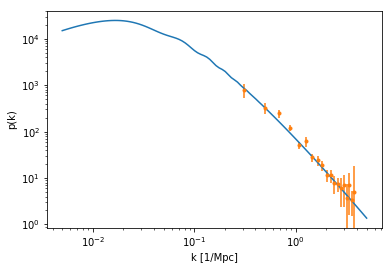

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

data = np.loadtxt('../data/lyman-alpha.txt')
data[:, 0] /= h  # renormalize k, because 

plt.loglog(K, P_k)
plt.errorbar(*data.T, marker='o', ms=3, ls='none')
plt.xlabel('k [1/Mpc]')
plt.ylabel('p(k)')

Add real data points to the above plot! 